## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [13]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1]
    }
)

In [14]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:, 0],
        'x2': X_m[:, 1]
    }
)

### Visualizacion de datos

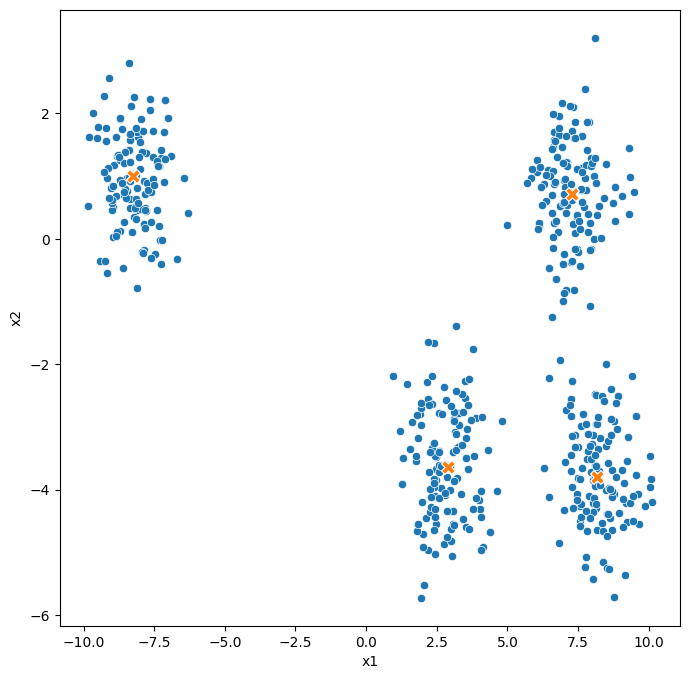

In [15]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x = 'x1', y='x2', marker='X', s = 100)
plt.plot()
plt.show()

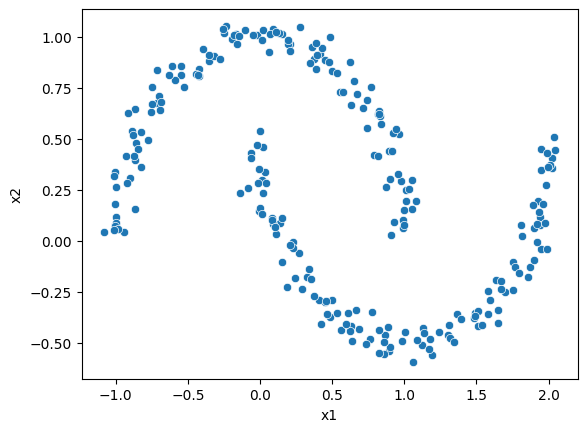

In [16]:
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

### Implementando DBSCAN

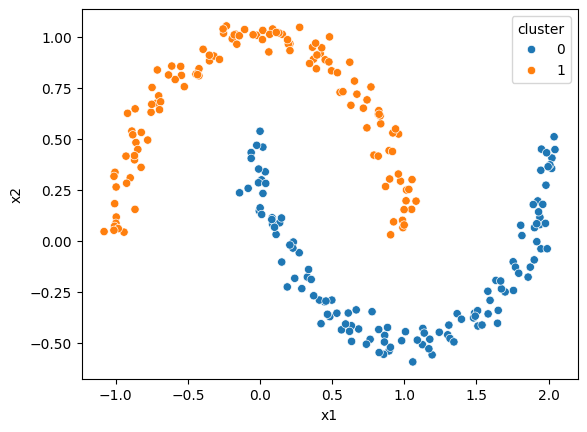

In [18]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

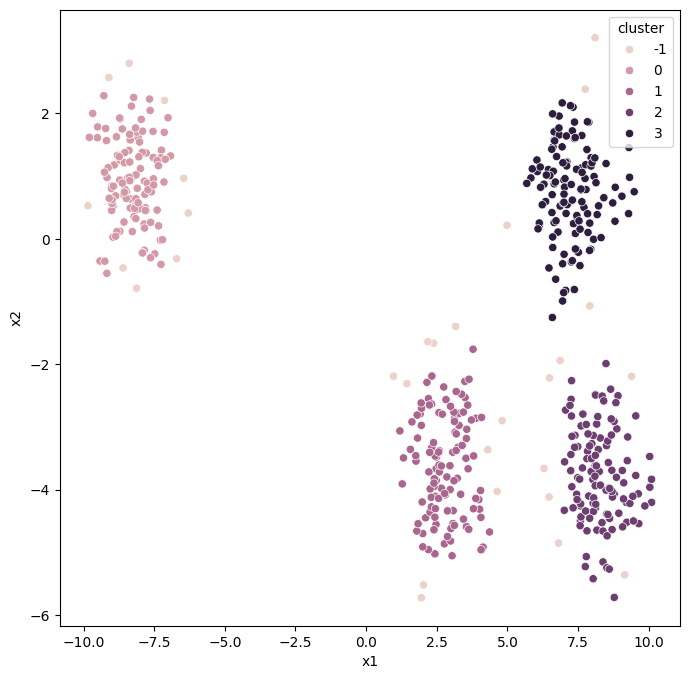

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data = df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

## Hyperparameters

In [22]:
from sklearn.neighbors import NearestNeighbors

In [23]:
neighbros = NearestNeighbors(n_neighbors=3)
neighbros_fit = neighbros.fit(X)
distances, indices = neighbros_fit.kneighbors(X)

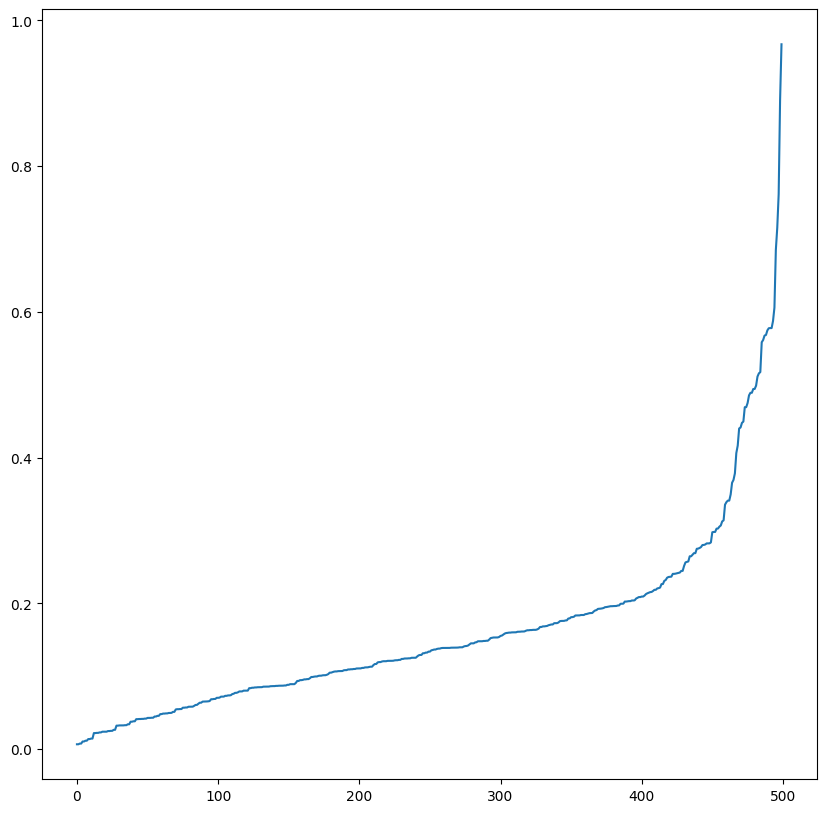

In [25]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

fig = plt.figure(figsize=(10, 10))
plt.plot(distances)

In [26]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)


In [27]:
min_samples

array([2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
from itertools import product

In [31]:
dnscan_paramns = list(product(eps_values, min_samples))
sil_scores = []
for p in dnscan_paramns:
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

In [36]:
df_paramns_tunning = pd.DataFrame.from_records(dnscan_paramns, columns= ['Eps', 'Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

In [39]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores', index='Min_Samples', columns='Eps')
pivot_data

Eps,0.25,0.35,0.45,0.55,0.65,0.75
Min_Samples,,,,,,
2,-0.009242,0.074636,0.382734,0.463487,0.734866,0.636233
3,-0.059676,0.137846,0.542309,0.691452,0.734866,0.636233
4,-0.105292,0.192322,0.650614,0.688896,0.728848,0.636233
5,-0.217438,0.156100,0.639970,0.678858,0.728848,0.634306
6,-0.297388,0.194277,0.548734,0.668775,0.721155,0.727670
7,-0.445412,0.246032,0.581688,0.660673,0.718281,0.727670
8,-0.545190,0.083999,0.549025,0.641157,0.717063,0.728153
9,-0.543887,0.086476,0.401128,0.632656,0.714080,0.725001


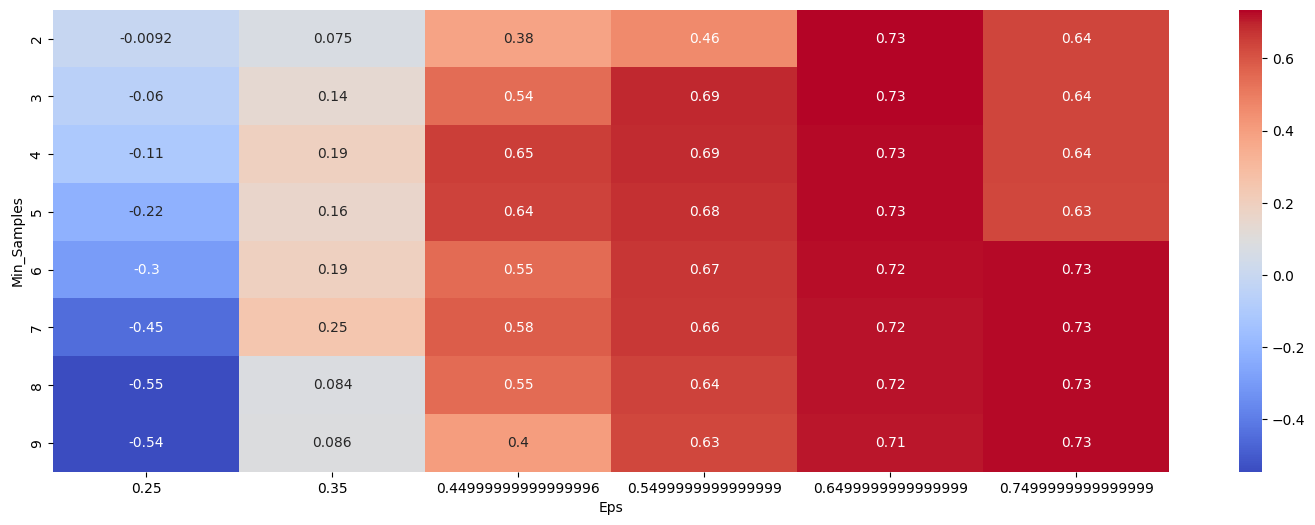

In [40]:
fig, ax = plt.subplots(figsize = (18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()